![cats_and_dogs](cats_and_dogs.jpg)


## Cats vs Dogs: The Great Pet Debate 🐱🐶

### 📖 Background

You and your friend have debated for years whether cats or dogs make more popular pets. You finally decide to settle the score by analyzing pet data across different regions of the UK. Your friend found data on estimated pet populations, average pets per household, and geographic factors across UK postal code areas. It's time to dig into the numbers and settle the cat vs. dog debate! 

### 💾 The data

There are three data files, which contains the data as follows below.

#### The `population_per_postal_code.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postal_code` | An identifier for each postal code area|
| `estimated_cat_population` | The estimated cat population for the postal code area |  
| `estimated_dog_population` | The estimated cat population for the postal code area |


#### The `avg_per_household.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postal_code` | An identifier for each postal code area|
| `cats_per_household` | The average number of cats per household in the postal code area |  
| `dog_per_household` | The average number of dogs per household in the postal code area |

#### The `postal_code_areas.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postal_code` | An identifier for each postal code area|
| `town` | The town/towns which are contained in the postal code area |  
| `county` | The UK county that the postal code area is located in |
| `population` | The population of people in each postal code area |
| `num_households` | The number of households in each postal code area |
| `uk_region` | The region in the UK which the postal code is located in |


***Acknowledgments**: 
Data has been assembled and modified from two different sources: [Animal and Plant Health Agency](https://www.data.gov.uk/search?filters%5Bpublisher%5D=Animal+and+Plant+Health+Agency), [Postcodes](
https://ideal-postcodes.co.uk/guides/postcode-areas).


In [106]:
!pip install waterfallcharts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import waterfall_chart

Defaulting to user installation because normal site-packages is not writeable


In [107]:
population_raw_data = pd.read_csv('data/population_per_postal_code.csv')
population_raw_data

,postal_code,estimated_cat_population,estimated_dog_population
0,AB10,"1,675.72","1,921.75"
1,AB11,"2,072.99","2,377.35"
2,AB12,"3,601.57","4,130.35"
3,AB13,"1,153.84","1,323.24"
4,AB14,"2,325.13","2,666.50"
...,...,...,...
2825,YO8,"5,115.47","5,866.53"
2826,ZE1,"1,895.51","2,173.81"
2827,ZE2,"4,586.34","5,259.71"
2828,ZE3,105.0080493,120.4254386


In [108]:
avg_raw_data = pd.read_csv('data/avg_per_household.csv')
avg_raw_data

,postcode,cats_per_household,dogs_per_household
0,AB10,0.164463,0.188610
1,AB11,0.206145,0.236411
2,AB12,0.300306,0.344397
3,AB13,1.145815,1.314045
4,AB14,1.008732,1.156835
...,...,...,...
2825,YO8,0.261034,0.299359
2826,ZE1,0.454124,0.520799
2827,ZE2,0.677350,0.776799
2828,ZE3,0.458550,0.525875


In [109]:
postcodes_raw_data = pd.read_csv('data/postal_codes_areas.csv')
postcodes_raw_data

,postal_code,town,county,population,num_households,uk_region
0,AB1,Aberdeen,Aberdeen,NaN,NaN,Scotland
1,AB2,Aberdeen,Aberdeen,NaN,NaN,Scotland
2,AB3,Aberdeen,Aberdeen,NaN,NaN,Scotland
3,AB4,"Fraserburgh, Peterhead, Macduff",Aberdeen,NaN,NaN,Scotland
4,AB5,"Buckie, Huntly, Inverurie",Aberdeen,NaN,NaN,Scotland
...,...,...,...,...,...,...
3110,YO91,"Lawrence Court, PO Boxes",York,NaN,NaN,Yorkshire and The Humber
3111,YO95,Pocklington,York,NaN,NaN,Yorkshire and The Humber
3112,ZE1,"Lerwick, Scalloway",Shetland,8445.0,3862.0,Scotland
3113,ZE2,Shetland,Shetland,14209.0,5845.0,Scotland


## 💪 Challenge

Leverage the pet data to analyze and compare cat vs. dog rates across different regions of the UK. Your goal is to identify factors associated with higher cat or dog popularity.  

Some examples:

- Examine if pet preferences correlate to estimated pet populations, or geographic regions. Create visualizations to present your findings.
- Develop an accessible summary of study findings on factors linked to cat and dog ownership rates for non-technical audiences.
- See if you can identify any regional trends; which areas prefer cats vs. dogs?

## 🧑‍⚖️ Judging criteria

This competition is for helping to understand how competitions work. This competition will not be judged.

## ✅ Checklist before publishing into the competition

- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

**Executive Summary**

People living in the UK follow a similar trend in adopting cats and dogs.

It is observed that the rate of adoption of cats and dogs decreases with the increase in population.

In every region and county of the UK, dog adoption is more common rather than cat adoption.

Compare to big cities, in rural region where the population is lower compare the others, people have  much dogs or cats 


_created by : Alper ŞAHİN_
_createdat  : 16 March 2024_

## ⌛️ Time is ticking. Good luck!

<span style="font-size:1em;color:darkblue">**Population per postal code**</span>

In [110]:
population_raw_data.info()
# There is no missing values in population raw data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830 entries, 0 to 2829
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   postal_code               2830 non-null   object
 1   estimated_cat_population  2830 non-null   object
 2   estimated_dog_population  2830 non-null   object
dtypes: object(3)
memory usage: 66.5+ KB


In [111]:
population_raw_data.head(3)

,postal_code,estimated_cat_population,estimated_dog_population
0,AB10,"1,675.72","1,921.75"
1,AB11,"2,072.99","2,377.35"
2,AB12,"3,601.57","4,130.35"


<span style="font-size:1em;color:darkblue">**Estimated cat and dog population are numeric values. Data must be converted from object to float64.**</span>

<span style="font-size:1em;color:darkblue">** Comma causes ValueError while converting from string to float.  In this reason, comma removed from the parameter values. **</span>

In [112]:
def obj_2_float(df, column_name):
    '''
    This function helps to convert object parameters to float64.
    '''
    if df[column_name].dtypes == 'O':
        df[column_name] = df[column_name].str.replace(',', '')
        return df[column_name].astype('float')
    else:
        return print(f"Data type of {column_name} is {df[column_name].dtypes}")

In [113]:
for col in population_raw_data.columns[1:]:
    print(col)
    population_raw_data[col] = obj_2_float(population_raw_data, col)

estimated_cat_population
estimated_dog_population


In [114]:
population_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830 entries, 0 to 2829
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   postal_code               2830 non-null   object 
 1   estimated_cat_population  2830 non-null   float64
 2   estimated_dog_population  2830 non-null   float64
dtypes: float64(2), object(1)
memory usage: 66.5+ KB


In [115]:
population_raw_data.describe().T
# If the cat or dog population are zero, these values might be removed from dataset.

,count,mean,std,min,25%,50%,75%,max
estimated_cat_population,2830.0,3574.121561,3175.924642,0.0,1223.7825,2794.390,5085.580,23544.45
estimated_dog_population,2830.0,4098.877737,3642.217209,0.0,1403.4550,3204.665,5832.255,27001.27


In [116]:
if len(population_raw_data.drop_duplicates(subset = ['postal_code'])) == len(population_raw_data):
    print('There is no dublicated postal code in dataset.')

else:
    print('The dataset contains dublicated postal codes.')
    initial_len = len(population_raw_data)
    population_raw_data.drop_duplicates(subset = ['postal_code'], inplace = True)
    print(f"{len(population_raw_data) - initial_len } postal code are removed from dataset.")

There is no dublicated postal code in dataset.


**Average Raw DataAverage Raw Data**

In [117]:
avg_raw_data.head(3)

,postcode,cats_per_household,dogs_per_household
0,AB10,0.164463,0.188610
1,AB11,0.206145,0.236411
2,AB12,0.300306,0.344397


In [118]:
avg_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830 entries, 0 to 2829
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   postcode            2830 non-null   object 
 1   cats_per_household  2830 non-null   float64
 2   dogs_per_household  2830 non-null   float64
dtypes: float64(2), object(1)
memory usage: 66.5+ KB


In [119]:
avg_raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cats_per_household,2830.0,0.451960,0.401342,0.0,0.196758,0.340893,0.592085,5.212126
dogs_per_household,2830.0,0.518317,0.460267,0.0,0.225646,0.390943,0.679015,5.977375


In [120]:
# Merge population_raw_data & avg_raw_data on postal_code

population_avg_data = pd.merge(population_raw_data,
                               avg_raw_data,
                               left_on = 'postal_code',
                               right_on = 'postcode',
                               how='left'
                              )
population_avg_data.head(5)

,postal_code,estimated_cat_population,estimated_dog_population,postcode,cats_per_household,dogs_per_household
0,AB10,1675.72,1921.75,AB10,0.164463,0.188610
1,AB11,2072.99,2377.35,AB11,0.206145,0.236411
2,AB12,3601.57,4130.35,AB12,0.300306,0.344397
3,AB13,1153.84,1323.24,AB13,1.145815,1.314045
4,AB14,2325.13,2666.50,AB14,1.008732,1.156835


In [121]:
# Both postcode and postal_code refer to same thing so postcode can be removed from population_avg_data.
population_avg_data.drop(['postcode'], 
                         axis=1,
                        inplace = True)

In [122]:
population_avg_data

,postal_code,estimated_cat_population,estimated_dog_population,cats_per_household,dogs_per_household
0,AB10,1675.720000,1921.750000,0.164463,0.188610
1,AB11,2072.990000,2377.350000,0.206145,0.236411
2,AB12,3601.570000,4130.350000,0.300306,0.344397
3,AB13,1153.840000,1323.240000,1.145815,1.314045
4,AB14,2325.130000,2666.500000,1.008732,1.156835
...,...,...,...,...,...
2825,YO8,5115.470000,5866.530000,0.261034,0.299359
2826,ZE1,1895.510000,2173.810000,0.454124,0.520799
2827,ZE2,4586.340000,5259.710000,0.677350,0.776799
2828,ZE3,105.008049,120.425439,0.458550,0.525875


**Postcodes Raw Data**

In [123]:
postcodes_raw_data.head(3)

,postal_code,town,county,population,num_households,uk_region
0,AB1,Aberdeen,Aberdeen,NaN,NaN,Scotland
1,AB2,Aberdeen,Aberdeen,NaN,NaN,Scotland
2,AB3,Aberdeen,Aberdeen,NaN,NaN,Scotland


In [124]:
postcodes_raw_data.info()
# Population and num_households columns includes missing values. These rows should ve removed from the dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3115 entries, 0 to 3114
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   postal_code     3115 non-null   object 
 1   town            3115 non-null   object 
 2   county          3114 non-null   object 
 3   population      2814 non-null   float64
 4   num_households  2814 non-null   float64
 5   uk_region       3079 non-null   object 
dtypes: float64(2), object(4)
memory usage: 146.1+ KB


In [125]:
postcodes_dropped_data = postcodes_raw_data.dropna()
postcodes_dropped_data.reset_index(drop = ['index'],
                                  inplace = True)
postcodes_dropped_data

,postal_code,town,county,population,num_households,uk_region
0,AB10,"Aberdeen city centre, Bridge of Dee, Mannofield",Aberdeen,21964.0,11517.0,Scotland
1,AB11,"Aberdeen city centre, Torry",Aberdeen,21237.0,10926.0,Scotland
2,AB12,"Aberdeen, Altens, Ardoe, Banchory Devenick, Bl...",Aberdeen,25414.0,10688.0,Scotland
3,AB13,Milltimber,Aberdeen,2725.0,947.0,Scotland
4,AB14,"Peterculter, Upper Anguston",Aberdeen,4881.0,2162.0,Scotland
...,...,...,...,...,...,...
2809,YO61,Easingwold,North Yorkshire,13914.0,5939.0,Yorkshire and The Humber
2810,YO62,"Thorpe Hall, Helmsley, Kirkbymoorside",North Yorkshire,11979.0,5116.0,Yorkshire and The Humber
2811,ZE1,"Lerwick, Scalloway",Shetland,8445.0,3862.0,Scotland
2812,ZE2,Shetland,Shetland,14209.0,5845.0,Scotland


<Figure size 1500x800 with 0 Axes>

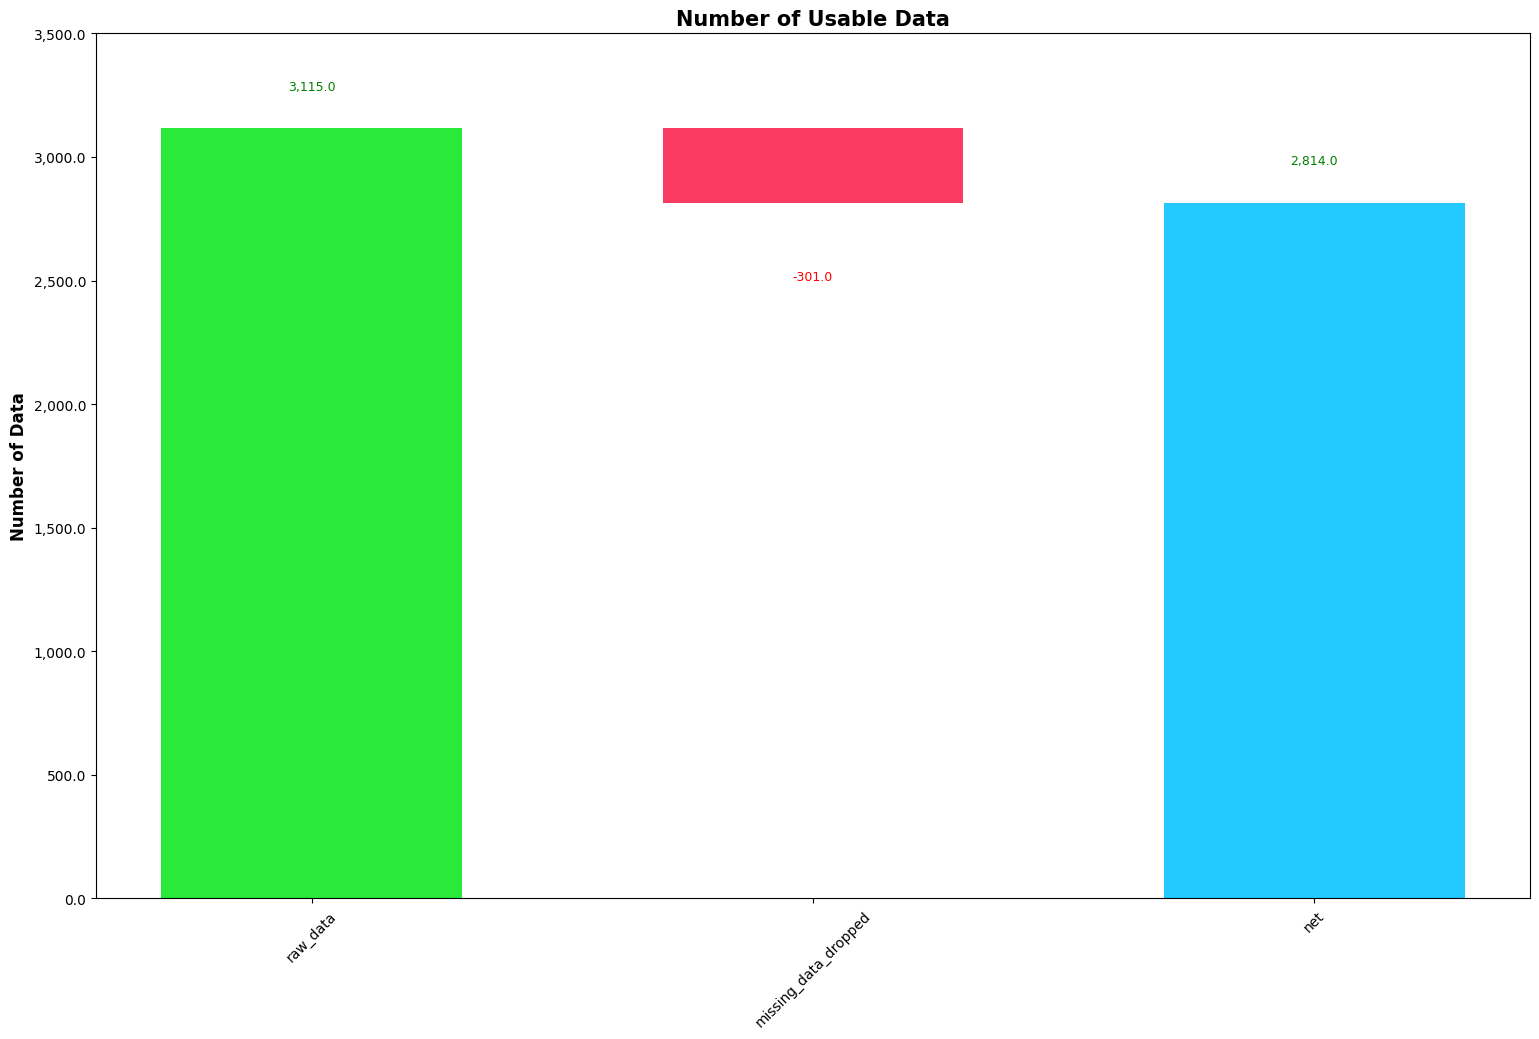

In [126]:
plt.figure(figsize=(15,8))
diff_len = [len(postcodes_raw_data),len(postcodes_dropped_data)- len(postcodes_raw_data)]
text_wf = ['raw_data','missing_data_dropped']
waterfall_chart.plot(text_wf,
                     diff_len,
                     sorted_value = False,
                     rotation_value = 45)
plt.title("Number of Usable Data",fontsize = 15,fontweight="bold")
plt.ylabel('Number of Data', fontsize=12,fontweight="bold")
plt.ylim([0,3500])
plt.grid(False)
plt.show()

In [127]:
print(f" Number of postal code for population_avg_data: {len(population_avg_data.postal_code.unique())}")
print(f" Number of postal code for postcodes_dropped_data: {len(postcodes_dropped_data.postal_code.unique())}")
# 16 postal codes do not include population, num_households, town info compare to population_avg_data.

 Number of postal code for population_avg_data: 2830
 Number of postal code for postcodes_dropped_data: 2814


In [128]:
# Merge population_avg_data & postcodes_dropped_data on postal_code

main_data = pd.merge(population_avg_data,
                     postcodes_dropped_data,
                     on = 'postal_code',
                     how='right'
                      )
main_data

,postal_code,estimated_cat_population,estimated_dog_population,cats_per_household,dogs_per_household,town,county,population,num_households,uk_region
0,AB10,1675.720000,1921.750000,0.164463,0.188610,"Aberdeen city centre, Bridge of Dee, Mannofield",Aberdeen,21964.0,11517.0,Scotland
1,AB11,2072.990000,2377.350000,0.206145,0.236411,"Aberdeen city centre, Torry",Aberdeen,21237.0,10926.0,Scotland
2,AB12,3601.570000,4130.350000,0.300306,0.344397,"Aberdeen, Altens, Ardoe, Banchory Devenick, Bl...",Aberdeen,25414.0,10688.0,Scotland
3,AB13,1153.840000,1323.240000,1.145815,1.314045,Milltimber,Aberdeen,2725.0,947.0,Scotland
4,AB14,2325.130000,2666.500000,1.008732,1.156835,"Peterculter, Upper Anguston",Aberdeen,4881.0,2162.0,Scotland
...,...,...,...,...,...,...,...,...,...,...
2809,YO61,12043.330000,13811.550000,1.933740,2.217654,Easingwold,North Yorkshire,13914.0,5939.0,Yorkshire and The Humber
2810,YO62,7248.410000,8312.630000,1.256223,1.440663,"Thorpe Hall, Helmsley, Kirkbymoorside",North Yorkshire,11979.0,5116.0,Yorkshire and The Humber
2811,ZE1,1895.510000,2173.810000,0.454124,0.520799,"Lerwick, Scalloway",Shetland,8445.0,3862.0,Scotland
2812,ZE2,4586.340000,5259.710000,0.677350,0.776799,Shetland,Shetland,14209.0,5845.0,Scotland


In [129]:
if len(main_data.drop_duplicates(subset = ['postal_code'])) == len(main_data):
    print('There is no dublicated postal code in dataset.')

else:
    print('The dataset contains dublicated postal codes.')
    initial_len = len(main_data)
    main_data.drop_duplicates(subset = ['postal_code'], inplace = True)
    print(f"{len(main_data) - initial_len } postal code are removed from dataset.")

There is no dublicated postal code in dataset.


In [130]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2814 entries, 0 to 2813
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   postal_code               2814 non-null   object 
 1   estimated_cat_population  2734 non-null   float64
 2   estimated_dog_population  2734 non-null   float64
 3   cats_per_household        2734 non-null   float64
 4   dogs_per_household        2734 non-null   float64
 5   town                      2814 non-null   object 
 6   county                    2814 non-null   object 
 7   population                2814 non-null   float64
 8   num_households            2814 non-null   float64
 9   uk_region                 2814 non-null   object 
dtypes: float64(6), object(4)
memory usage: 306.4+ KB


In [131]:
main_data_no_na = main_data[ (main_data.estimated_cat_population.isna() != True) |  \
                             (main_data.estimated_dog_population.isna() != True)                  
                           ]

main_data_no_na.reset_index(drop = ['index'], 
                           inplace = True)
main_data_no_na

,postal_code,estimated_cat_population,estimated_dog_population,cats_per_household,dogs_per_household,town,county,population,num_households,uk_region
0,AB10,1675.720000,1921.750000,0.164463,0.188610,"Aberdeen city centre, Bridge of Dee, Mannofield",Aberdeen,21964.0,11517.0,Scotland
1,AB11,2072.990000,2377.350000,0.206145,0.236411,"Aberdeen city centre, Torry",Aberdeen,21237.0,10926.0,Scotland
2,AB12,3601.570000,4130.350000,0.300306,0.344397,"Aberdeen, Altens, Ardoe, Banchory Devenick, Bl...",Aberdeen,25414.0,10688.0,Scotland
3,AB13,1153.840000,1323.240000,1.145815,1.314045,Milltimber,Aberdeen,2725.0,947.0,Scotland
4,AB14,2325.130000,2666.500000,1.008732,1.156835,"Peterculter, Upper Anguston",Aberdeen,4881.0,2162.0,Scotland
...,...,...,...,...,...,...,...,...,...,...
2729,YO61,12043.330000,13811.550000,1.933740,2.217654,Easingwold,North Yorkshire,13914.0,5939.0,Yorkshire and The Humber
2730,YO62,7248.410000,8312.630000,1.256223,1.440663,"Thorpe Hall, Helmsley, Kirkbymoorside",North Yorkshire,11979.0,5116.0,Yorkshire and The Humber
2731,ZE1,1895.510000,2173.810000,0.454124,0.520799,"Lerwick, Scalloway",Shetland,8445.0,3862.0,Scotland
2732,ZE2,4586.340000,5259.710000,0.677350,0.776799,Shetland,Shetland,14209.0,5845.0,Scotland


In [132]:
# 80 (2814 -2734) postal code which in postcodes_dropped_data, not in population_avg_data.
# Let prove it.
count = 0
for post_code in  postcodes_dropped_data.postal_code.unique():
    if post_code not in  population_avg_data.postal_code.unique():
        print(post_code)
        count +=1
    else:
        pass
print('#############################')
print(count)

BT1
BT2
BT3
BT4
BT5
BT6
BT7
BT8
BT9
BT10
BT11
BT12
BT13
BT14
BT15
BT16
BT17
BT18
BT19
BT20
BT21
BT22
BT23
BT24
BT25
BT26
BT27
BT28
BT29
BT30
BT31
BT32
BT33
BT34
BT35
BT36
BT37
BT38
BT39
BT40
BT41
BT42
BT43
BT44
BT45
BT46
BT47
BT48
BT49
BT51
BT52
BT53
BT54
BT55
BT56
BT57
BT60
BT61
BT62
BT63
BT64
BT65
BT66
BT67
BT68
BT69
BT70
BT71
BT74
BT75
BT76
BT77
BT78
BT79
BT80
BT81
BT82
BT92
BT93
BT94
#############################
80


In [133]:
# cats/dogs per population.
main_data_no_na['dogs_per_population'] = main_data_no_na.estimated_dog_population / main_data_no_na.population
main_data_no_na['cats_per_population'] = main_data_no_na.estimated_cat_population / main_data_no_na.population
main_data_no_na

,postal_code,estimated_cat_population,estimated_dog_population,cats_per_household,dogs_per_household,town,county,population,num_households,uk_region,dogs_per_population,cats_per_population
0,AB10,1675.720000,1921.750000,0.164463,0.188610,"Aberdeen city centre, Bridge of Dee, Mannofield",Aberdeen,21964.0,11517.0,Scotland,0.087495,0.076294
1,AB11,2072.990000,2377.350000,0.206145,0.236411,"Aberdeen city centre, Torry",Aberdeen,21237.0,10926.0,Scotland,0.111944,0.097612
2,AB12,3601.570000,4130.350000,0.300306,0.344397,"Aberdeen, Altens, Ardoe, Banchory Devenick, Bl...",Aberdeen,25414.0,10688.0,Scotland,0.162523,0.141716
3,AB13,1153.840000,1323.240000,1.145815,1.314045,Milltimber,Aberdeen,2725.0,947.0,Scotland,0.485593,0.423428
4,AB14,2325.130000,2666.500000,1.008732,1.156835,"Peterculter, Upper Anguston",Aberdeen,4881.0,2162.0,Scotland,0.546302,0.476363
...,...,...,...,...,...,...,...,...,...,...,...,...
2729,YO61,12043.330000,13811.550000,1.933740,2.217654,Easingwold,North Yorkshire,13914.0,5939.0,Yorkshire and The Humber,0.992637,0.865555
2730,YO62,7248.410000,8312.630000,1.256223,1.440663,"Thorpe Hall, Helmsley, Kirkbymoorside",North Yorkshire,11979.0,5116.0,Yorkshire and The Humber,0.693934,0.605093
2731,ZE1,1895.510000,2173.810000,0.454124,0.520799,"Lerwick, Scalloway",Shetland,8445.0,3862.0,Scotland,0.257408,0.224454
2732,ZE2,4586.340000,5259.710000,0.677350,0.776799,Shetland,Shetland,14209.0,5845.0,Scotland,0.370167,0.322777


In [134]:
def scat_px_plot(df, column_x, column_y, color, symbol):
    fig = px.scatter(df, 
                 x= column_x,
                 y= column_y, 
                 color= color, symbol= symbol)
    fig.show()

In [135]:
scat_px_plot(main_data_no_na, 'cats_per_household', 'cats_per_household', 'uk_region', None)
# In East Midlands people dont have cats compare to Scotland according to given dataset.

In [136]:
main_data_no_na.groupby(by = 'uk_region').mean()[['cats_per_household',
                                                  'estimated_cat_population', 
                                                  'cats_per_population' ]].sort_values(by = 'cats_per_household',
                                                                                      ascending = False)

,cats_per_household,estimated_cat_population,cats_per_population
uk_region,,,
Wales,0.717931,3551.782548,0.355164
South West,0.647183,5124.242894,0.307576
Scotland,0.531627,2227.493080,0.283210
South East,0.495381,4461.319116,0.219391
East of England,0.453443,4447.546915,0.206600
Yorkshire and The Humber,0.426051,4132.660723,0.195906
West Midlands,0.421887,3900.343702,0.190744
East Midlands,0.412275,5343.777169,0.187541
North West,0.387795,3756.234503,0.219397


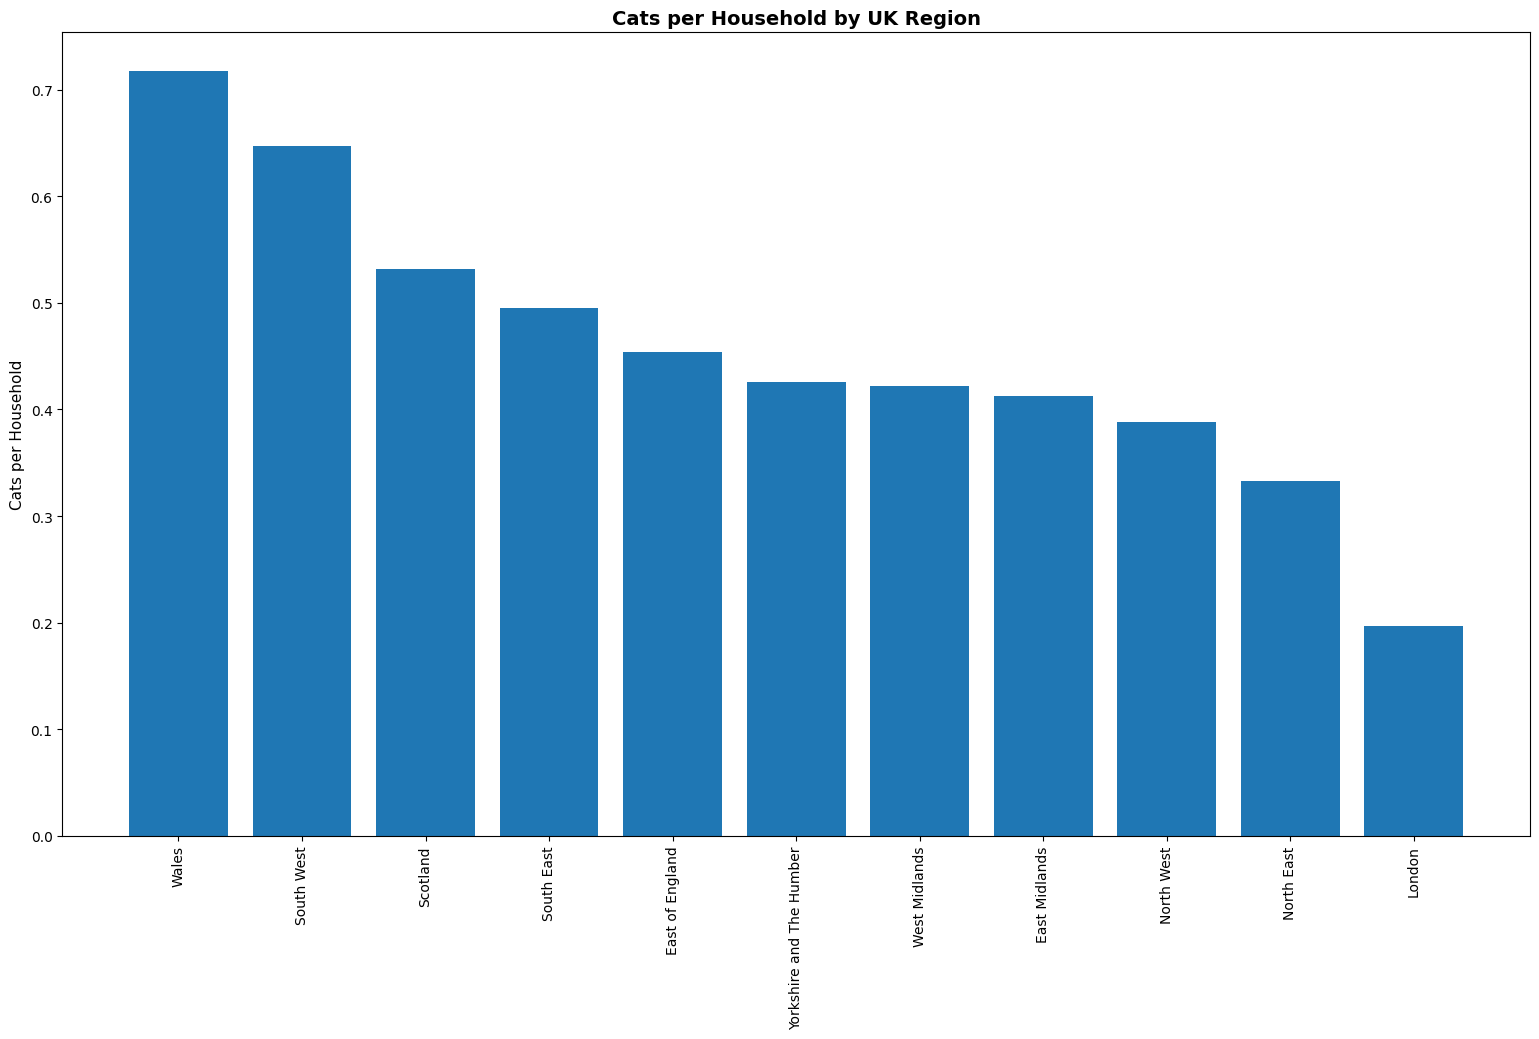

In [137]:
plt_df = main_data_no_na.groupby(by = 'uk_region').mean().sort_values(by = 'cats_per_household',
                                                                            ascending = False)
plt.bar(plt_df.index, 
        plt_df['cats_per_household'],
        width = 0.8)

plt.ylabel('Cats per Household', fontsize = 11)
plt.title('Cats per Household by UK Region',fontweight = 'bold' , fontsize = 14)
plt.xticks(rotation=90)
plt.show()

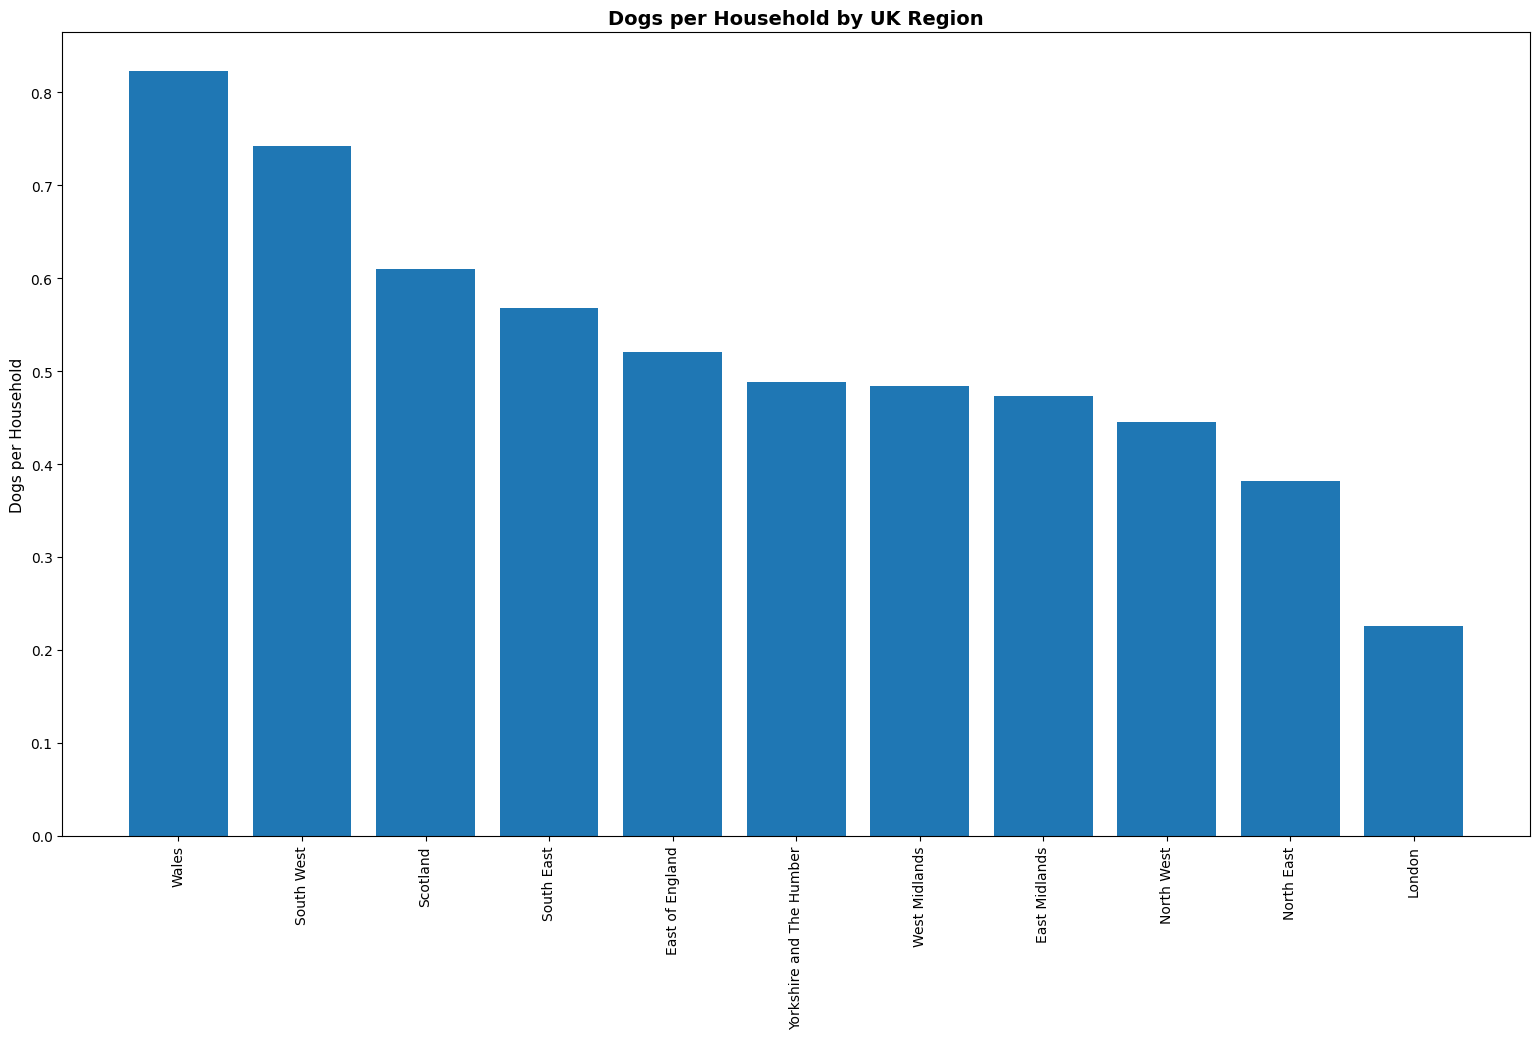

In [138]:
plt_df = main_data_no_na.groupby(by = 'uk_region').mean().sort_values(by = 'dogs_per_household',
                                                                            ascending = False)
plt.bar(plt_df.index, 
        plt_df['dogs_per_household'],
        width = 0.8)
plt.ylabel('Dogs per Household', fontsize = 11)
plt.title('Dogs per Household by UK Region',fontweight = 'bold' , fontsize = 14)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix of Cats | Dogs ')

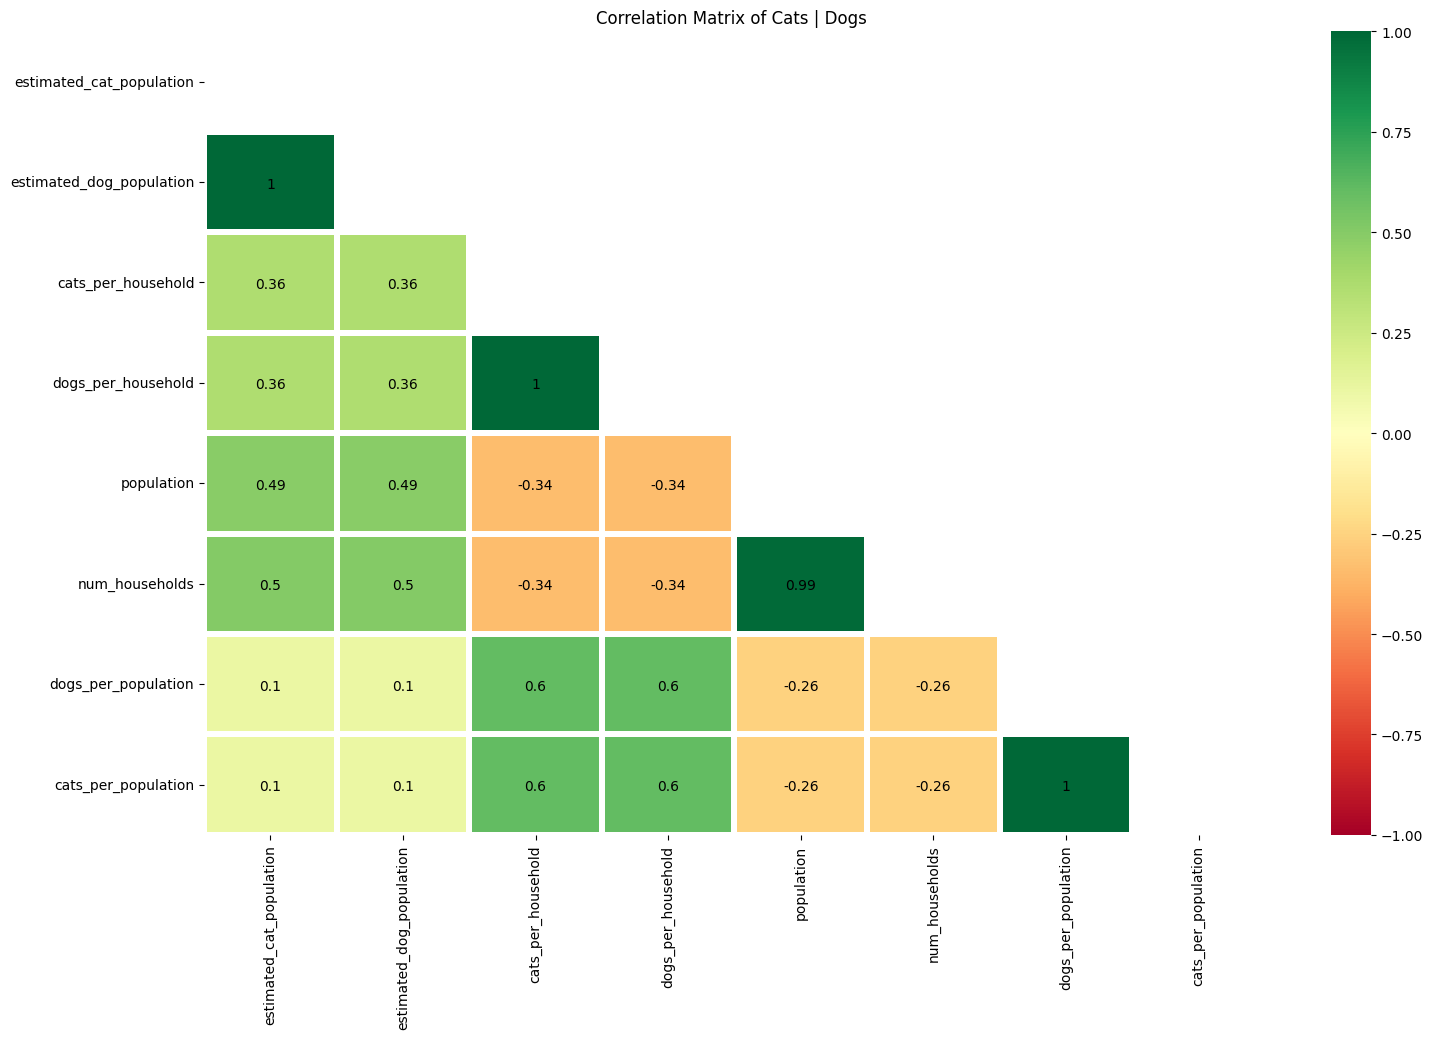

In [139]:
# Examine if pet preferences correlate to estimated pet populations, or geographic regions. Create visualizations to present your findings.

plt.rcParams["figure.figsize"] = [15.50, 10.50]
plt.rcParams["figure.autolayout"] = True

corr= main_data_no_na.corr()
mask = np.triu(np.ones_like(corr,
                            dtype=bool))
sns.heatmap(corr,cmap="RdYlGn",
            annot = True, 
            annot_kws={"size": 10,
                       "va": "center_baseline",
                       "color": "black"},
            mask = mask,
            vmin=-1, 
            vmax=1,
            linewidth=3)
plt.title('Correlation Matrix of Cats | Dogs ')

Estimated dog population and  estimated cat population highly correlated.
Increasing households affects negatively cats/dogs per household.



Develop an accessible summary of study findings on factors linked to cat and dog ownership rates for non-technical audiences.

See if you can identify any regional trends; which areas prefer cats vs. dogs?

In [140]:
scat_px_plot(main_data_no_na, 'population', 'cats_per_household', 'uk_region', None)
# When the population increases, cats per household goes down.

In [141]:
scat_px_plot(main_data_no_na, 'population', 'dogs_per_household', 'uk_region', None)
# When the population increases, dogs per household goes down.

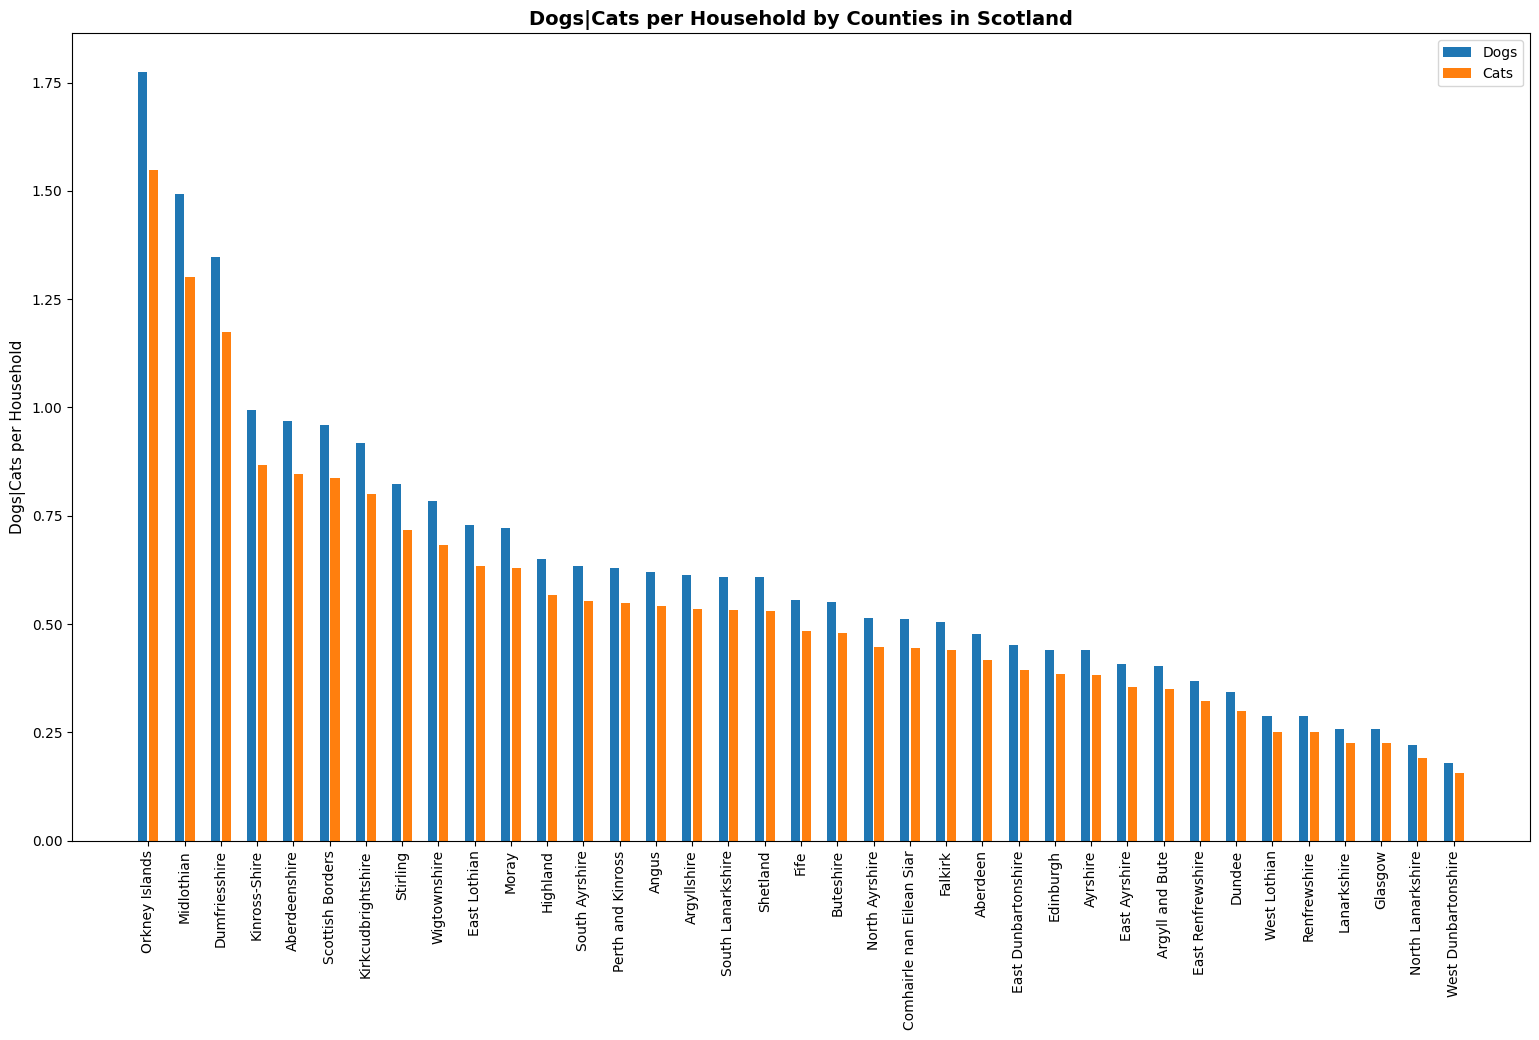

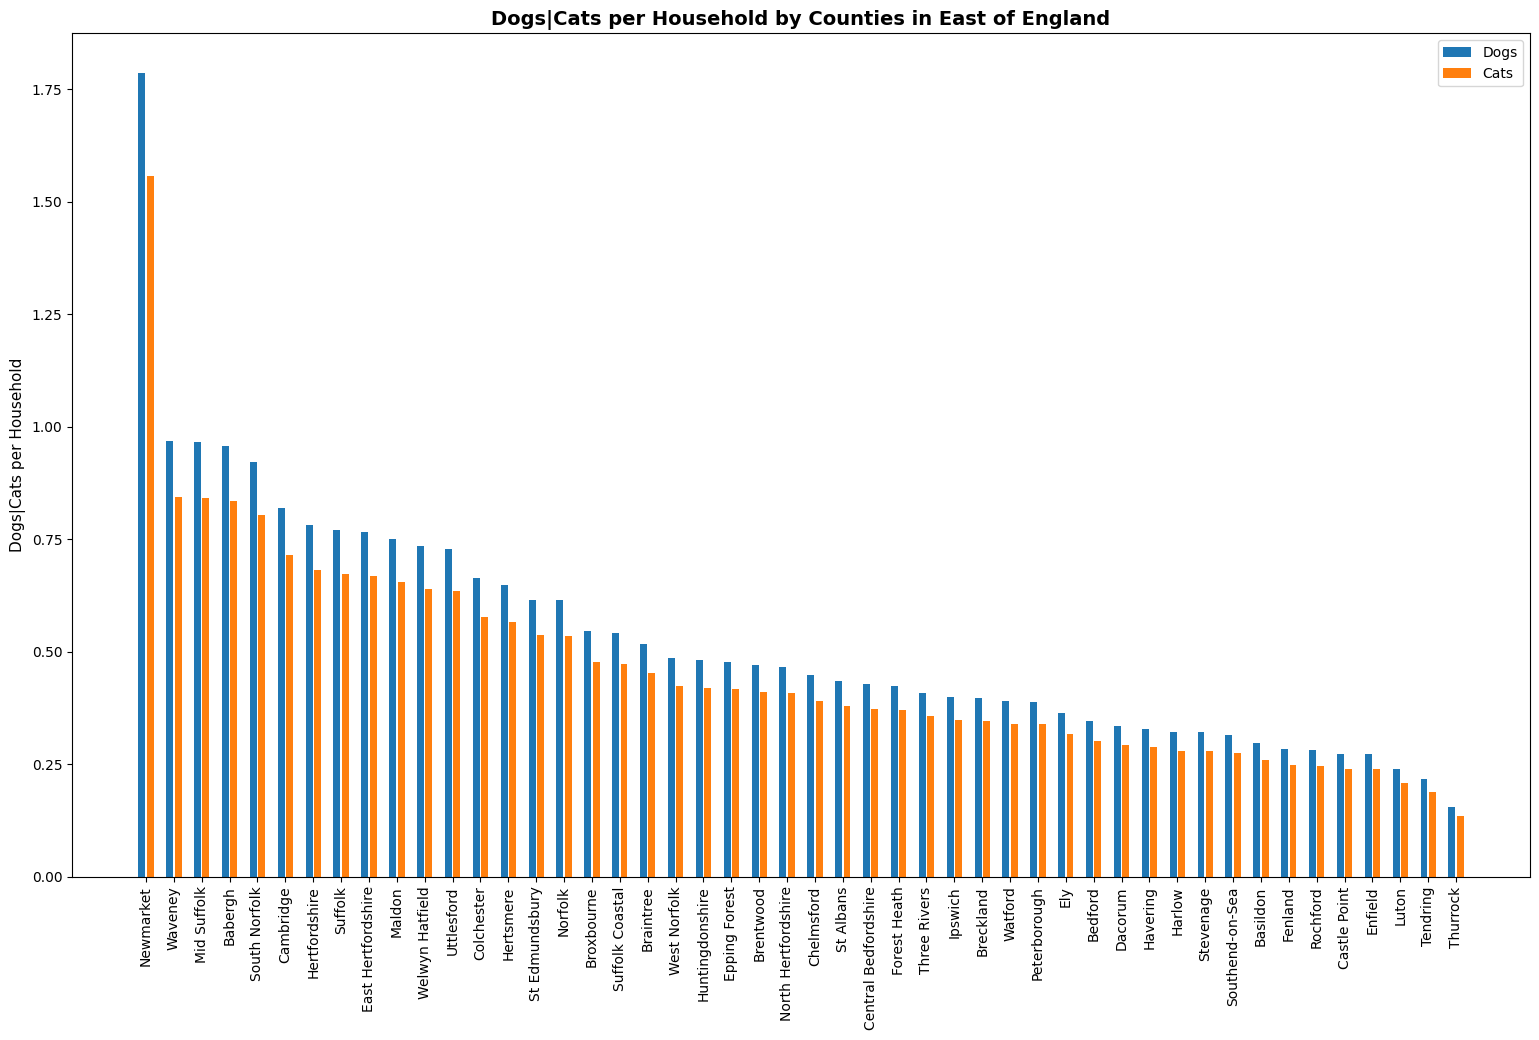

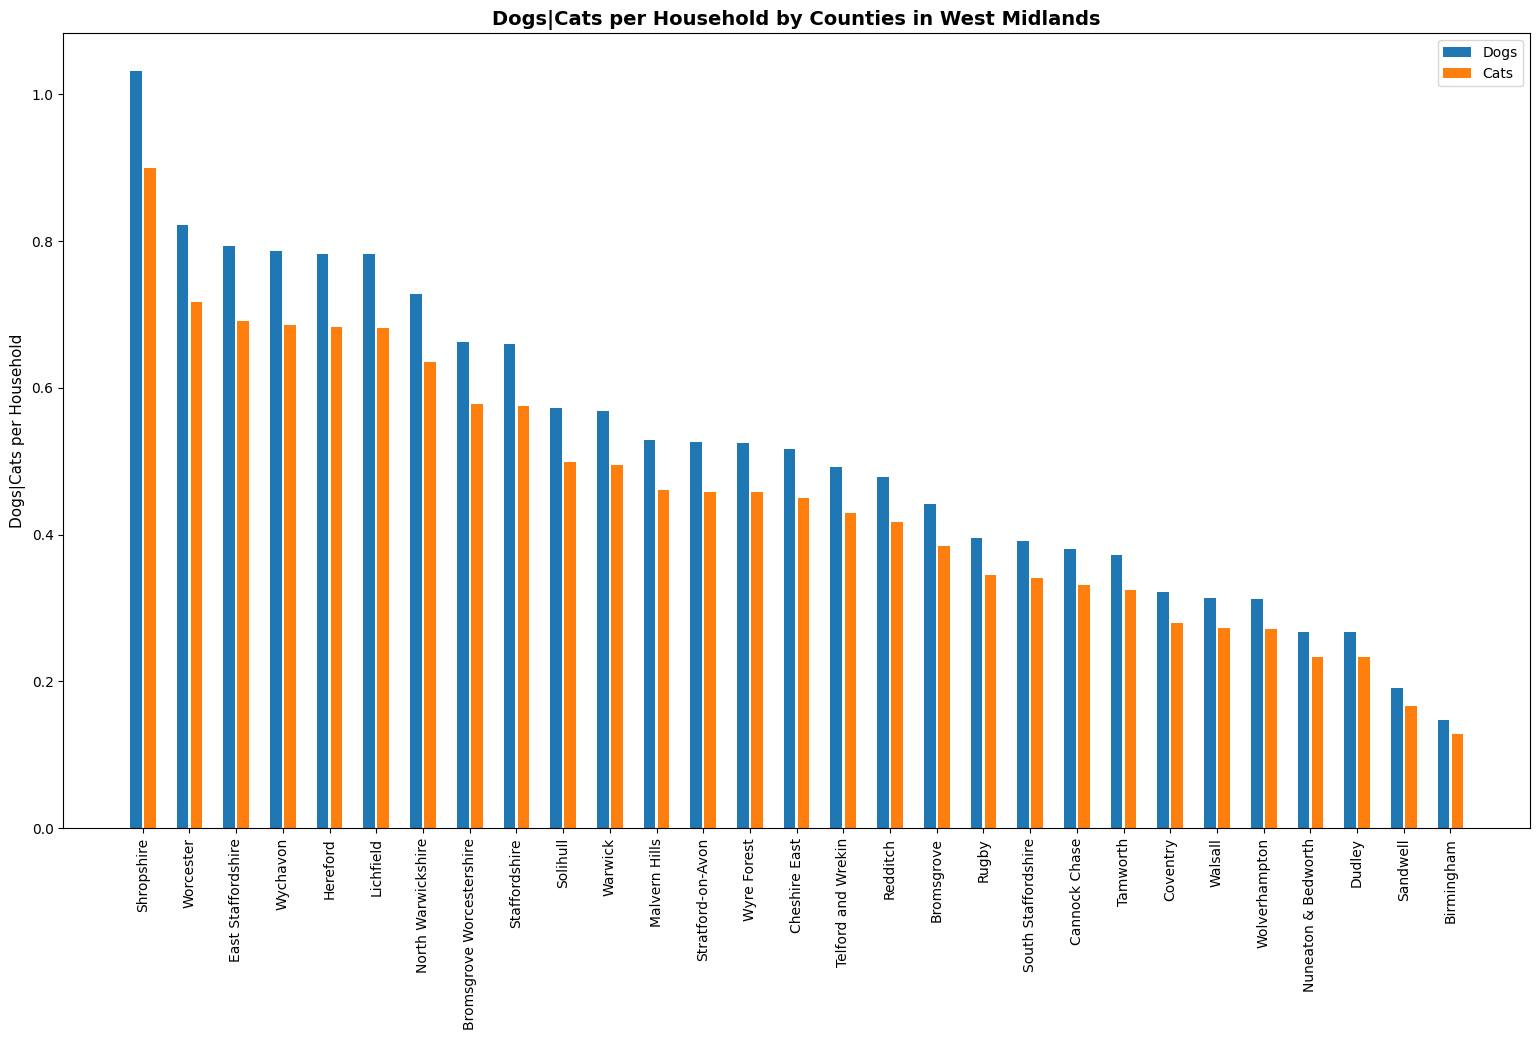

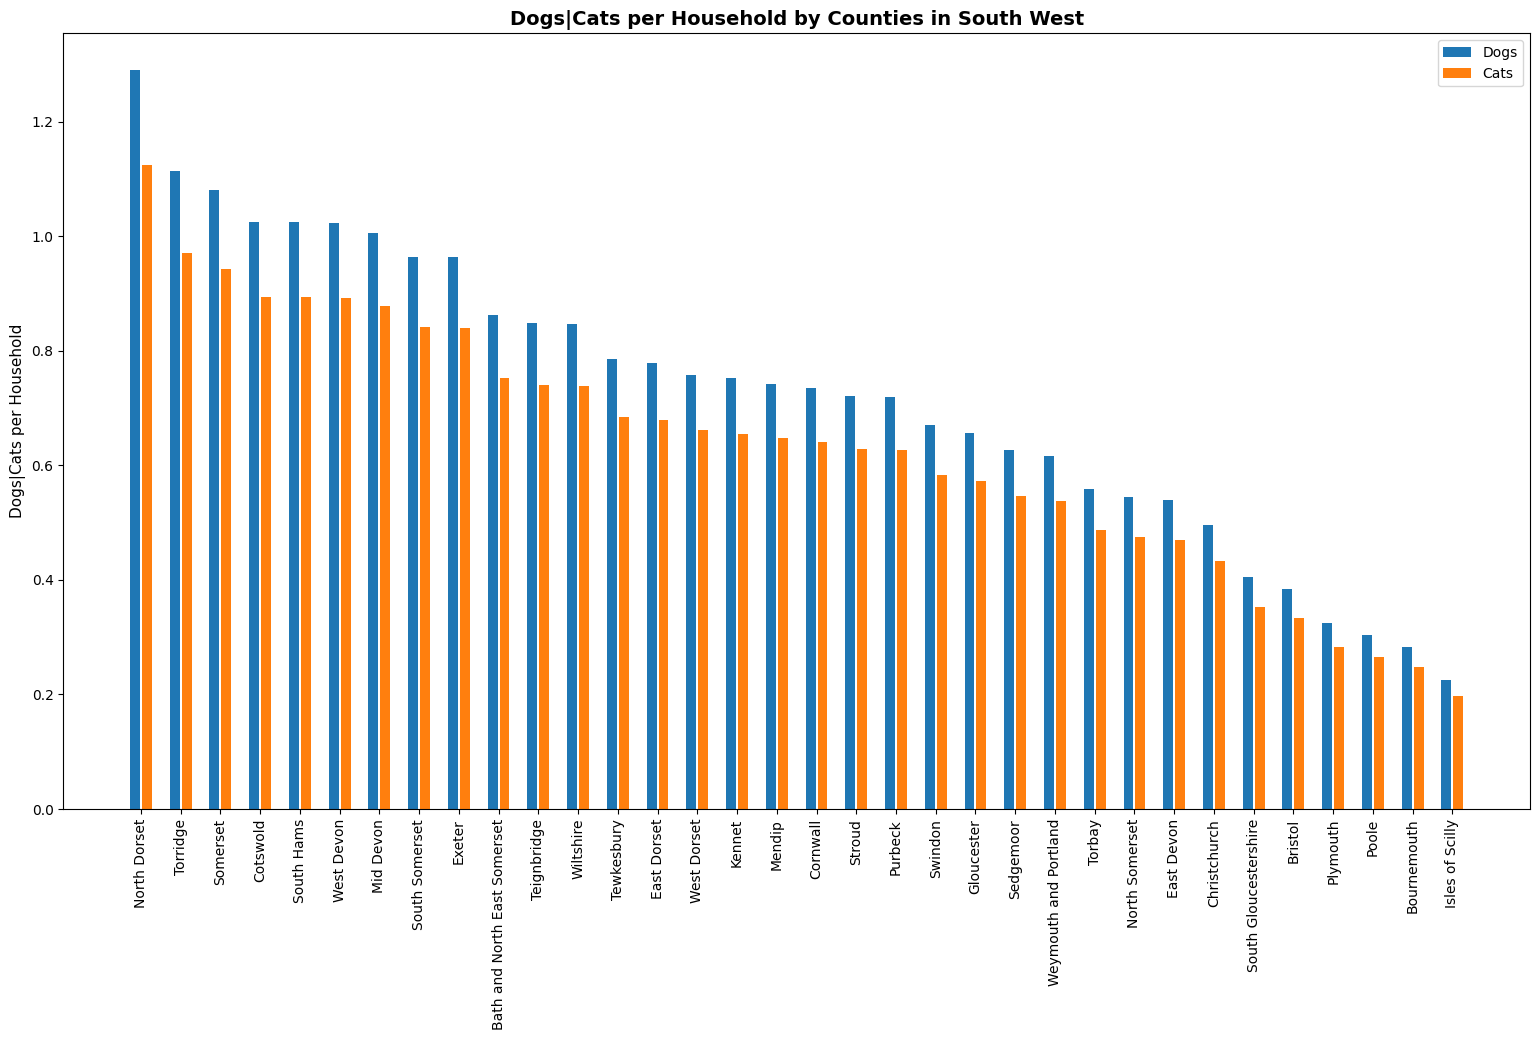

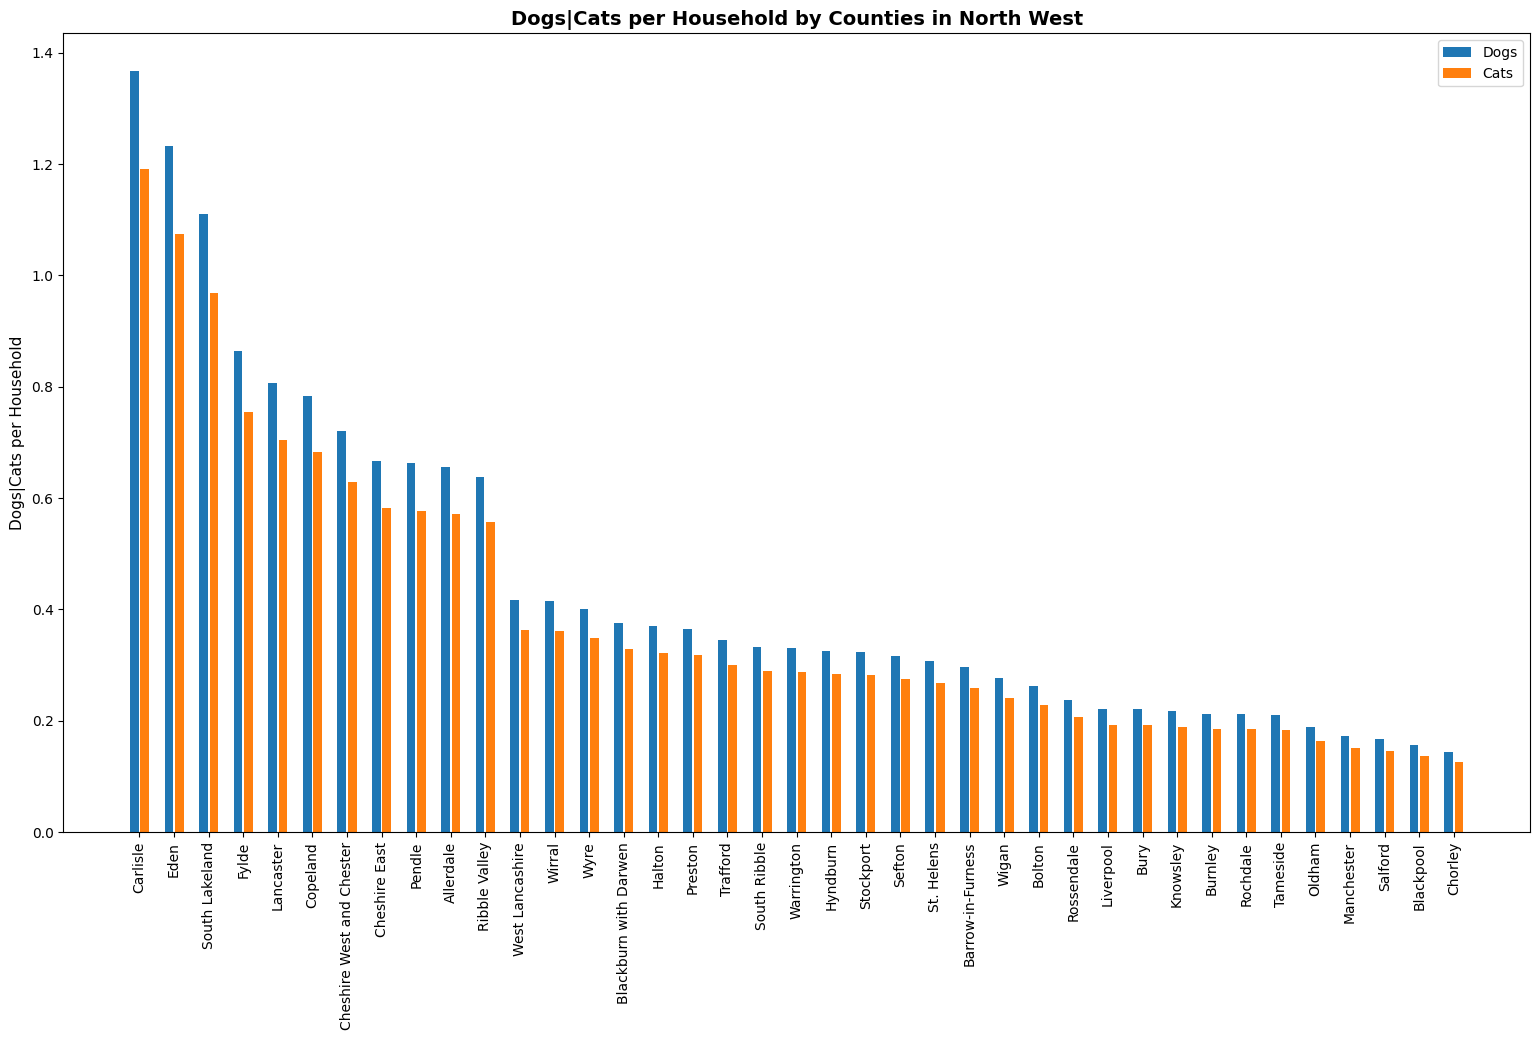

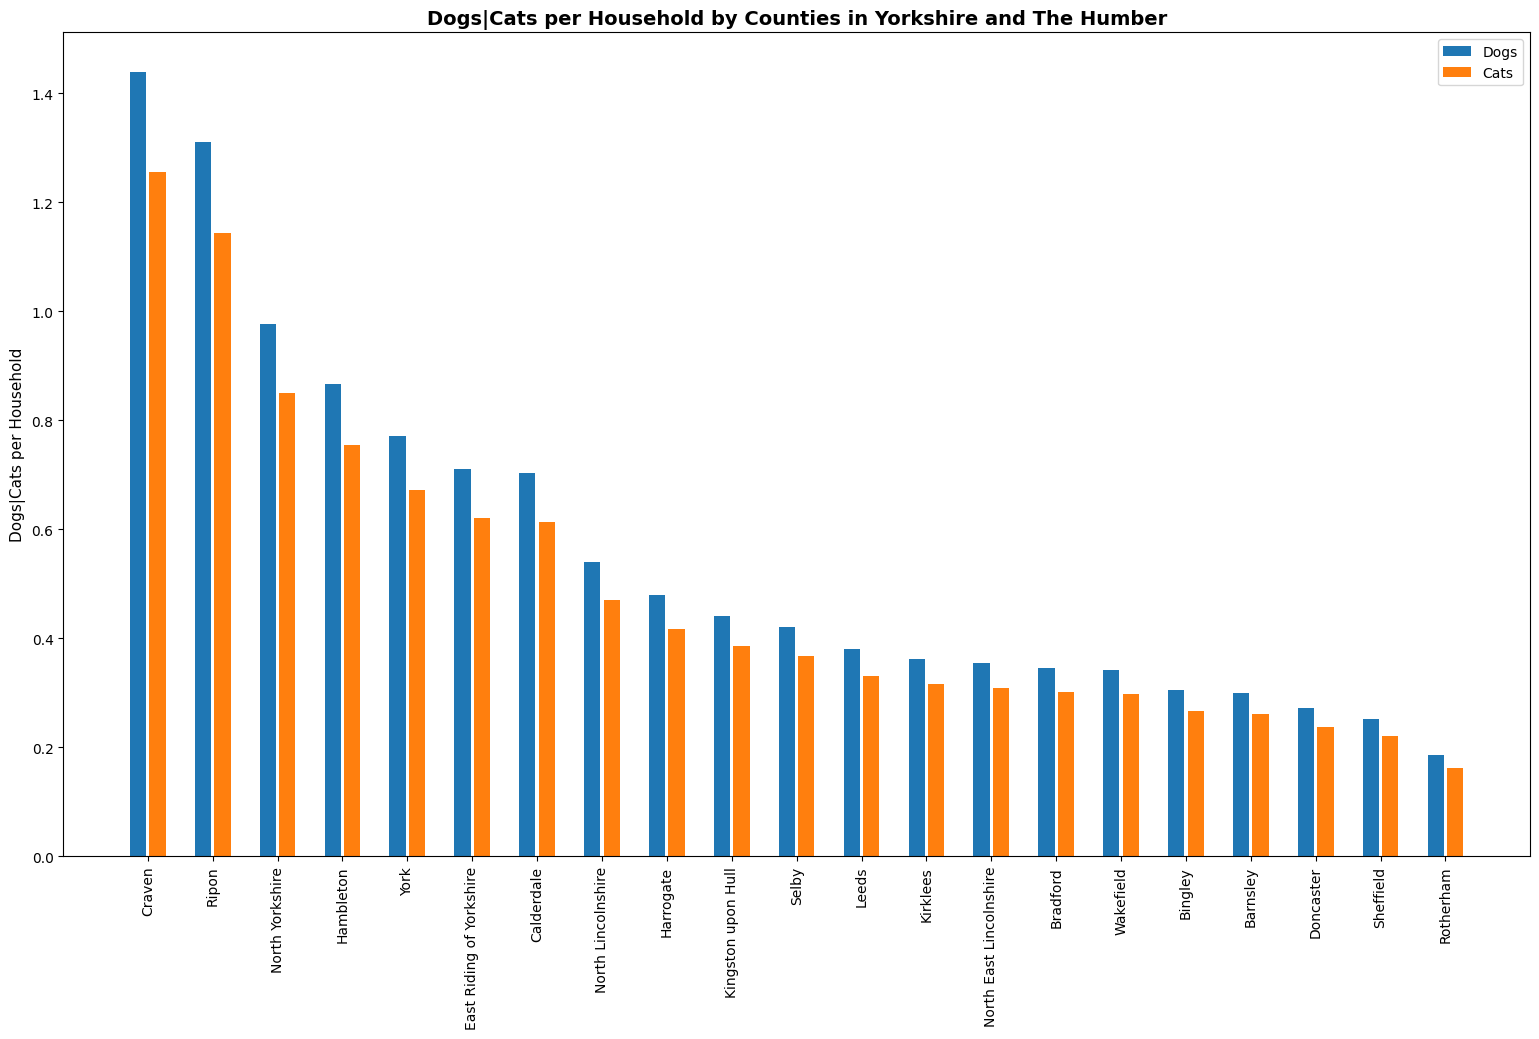

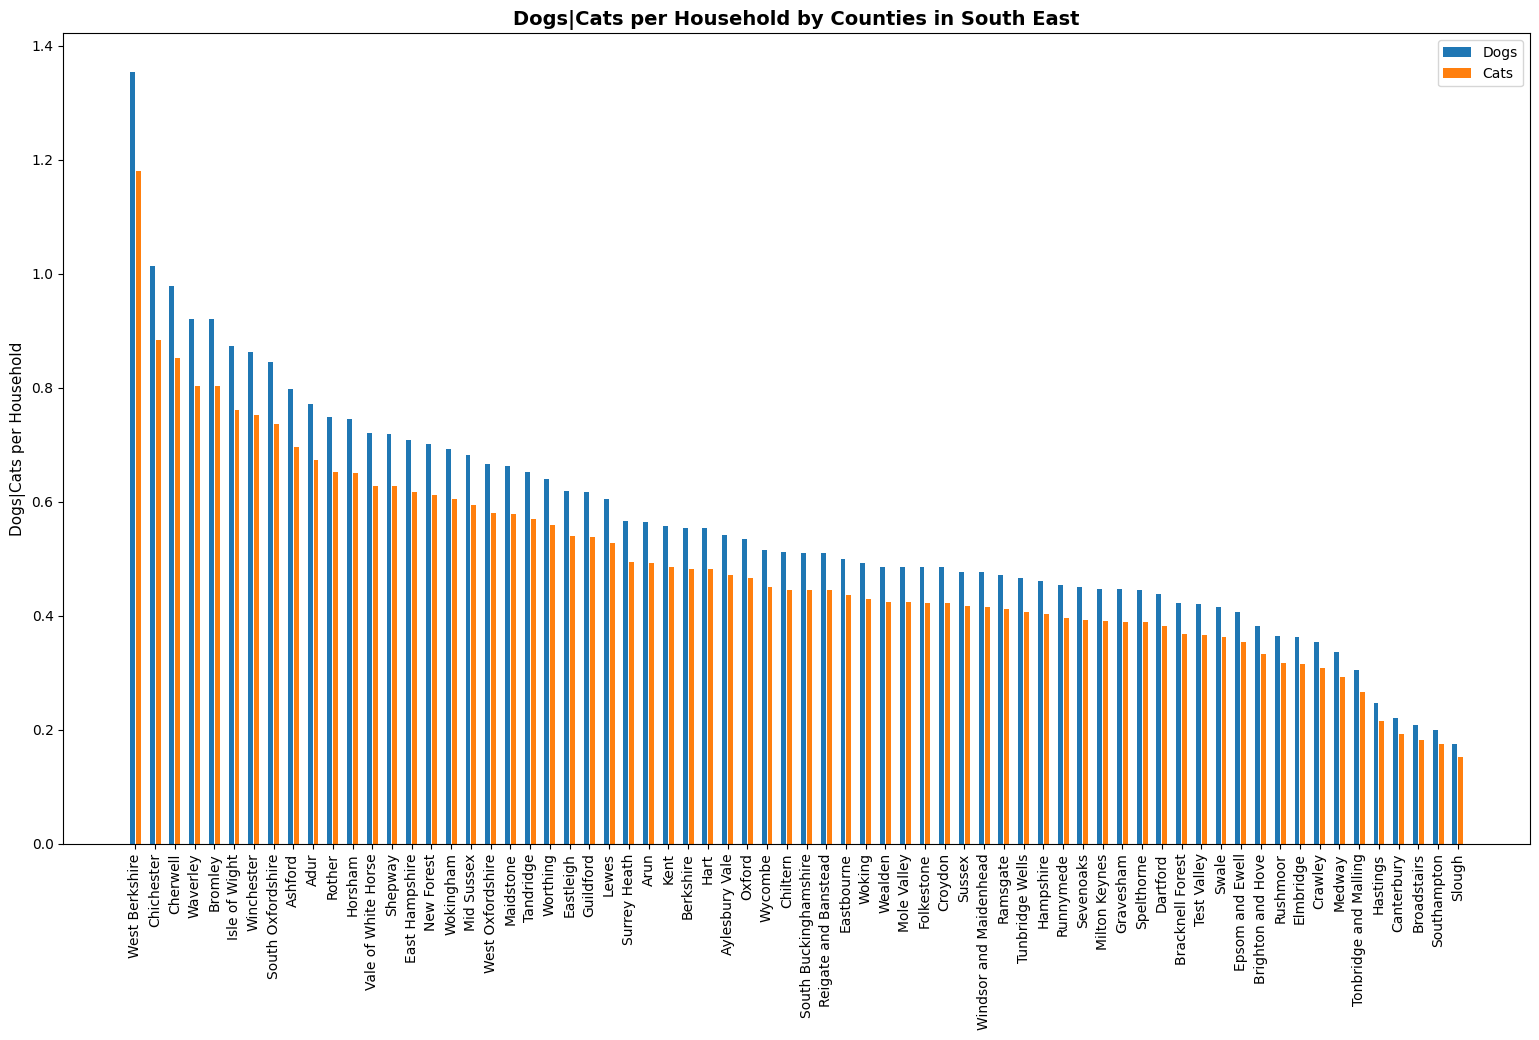

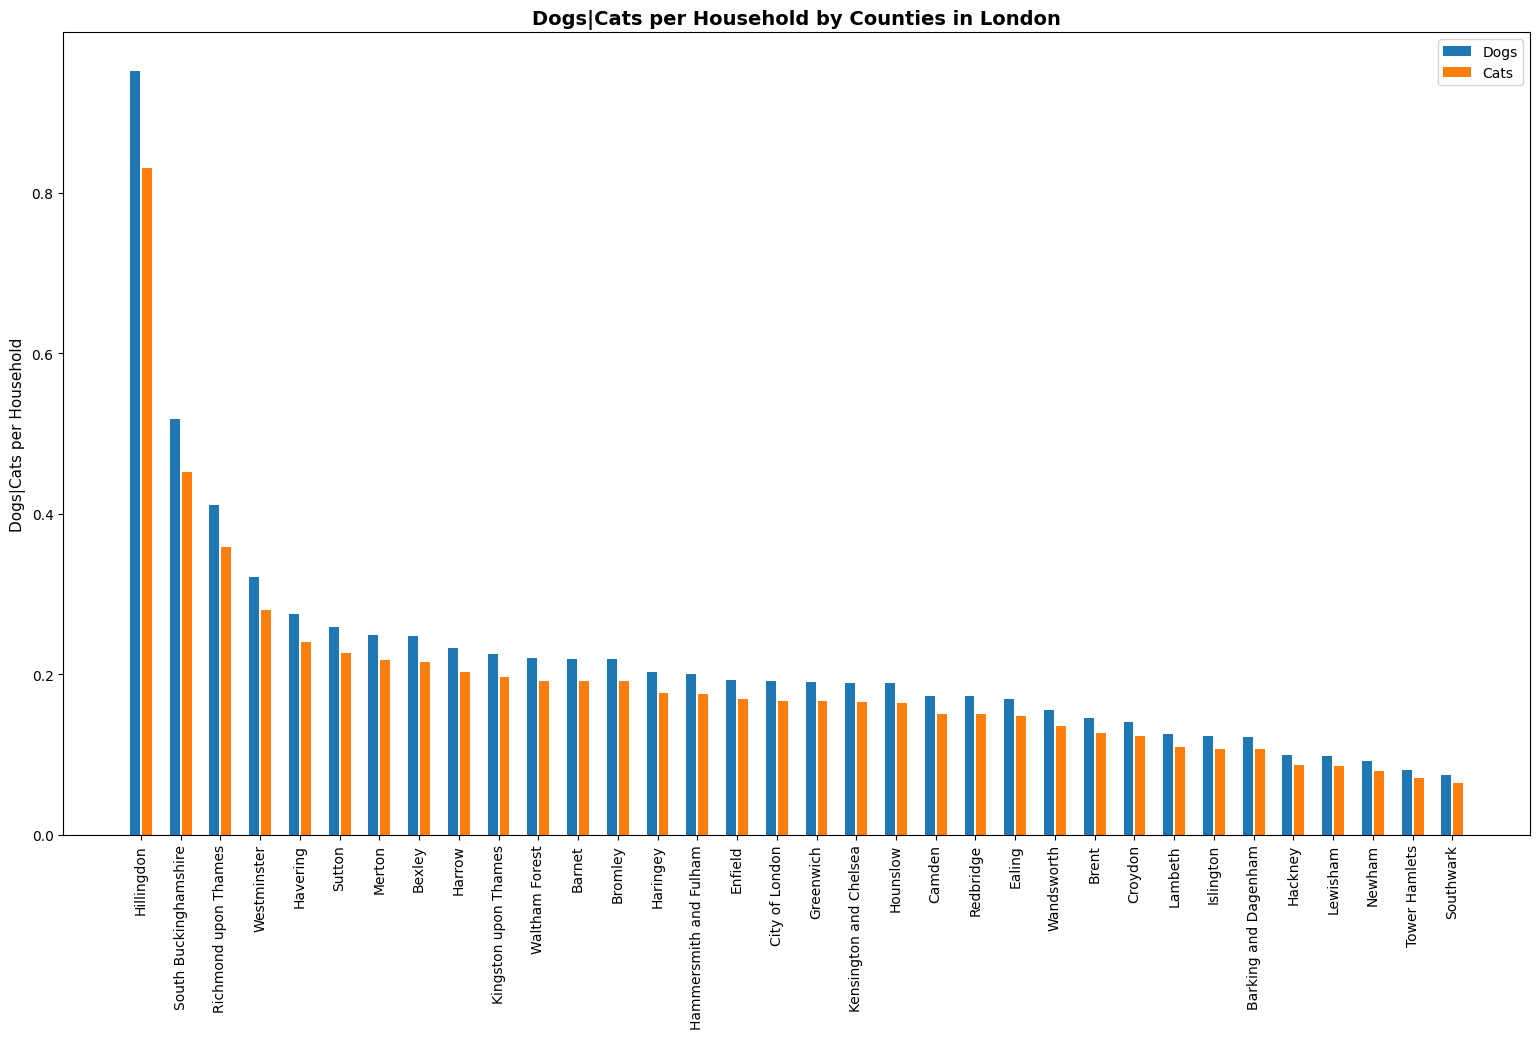

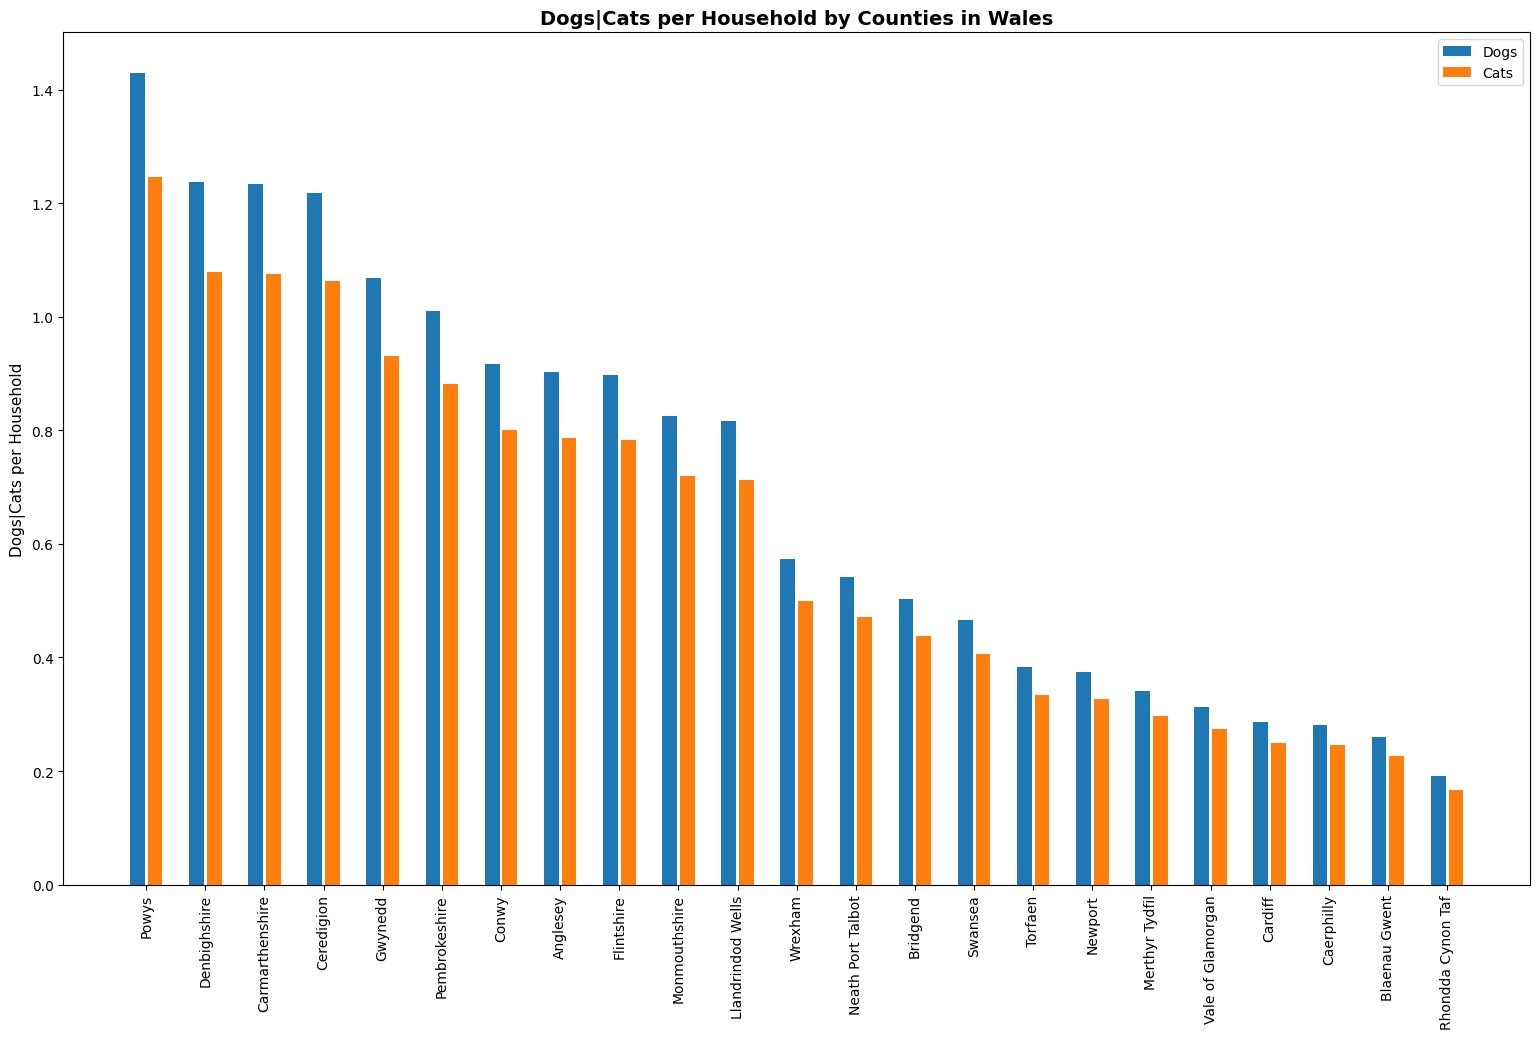

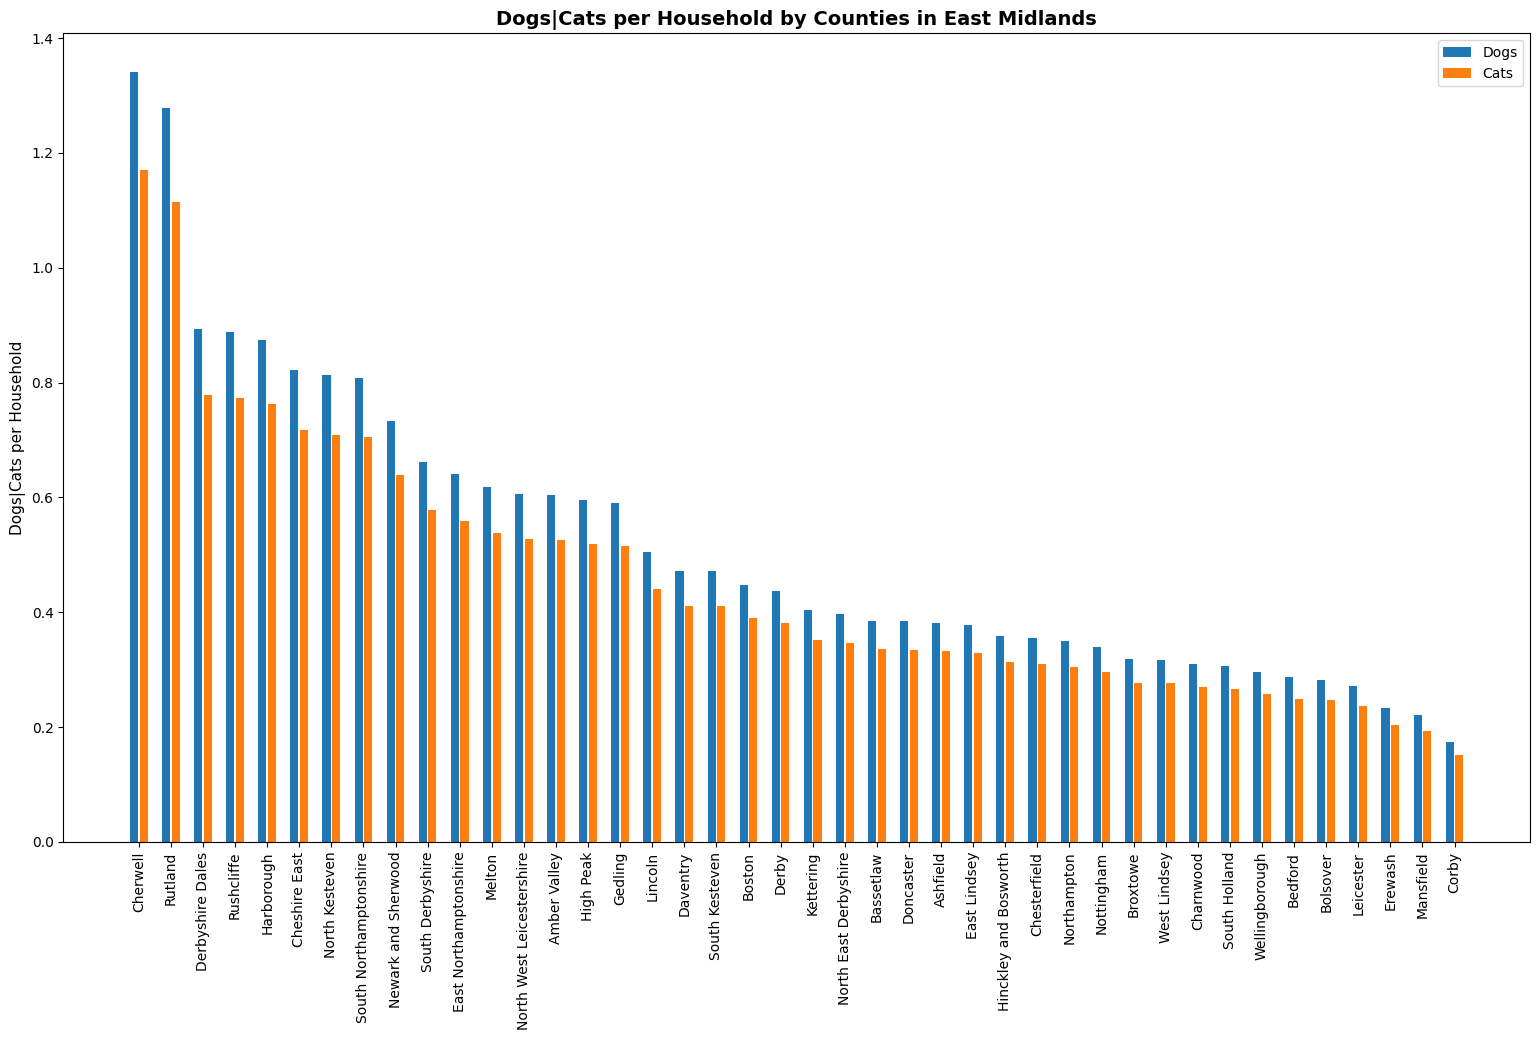

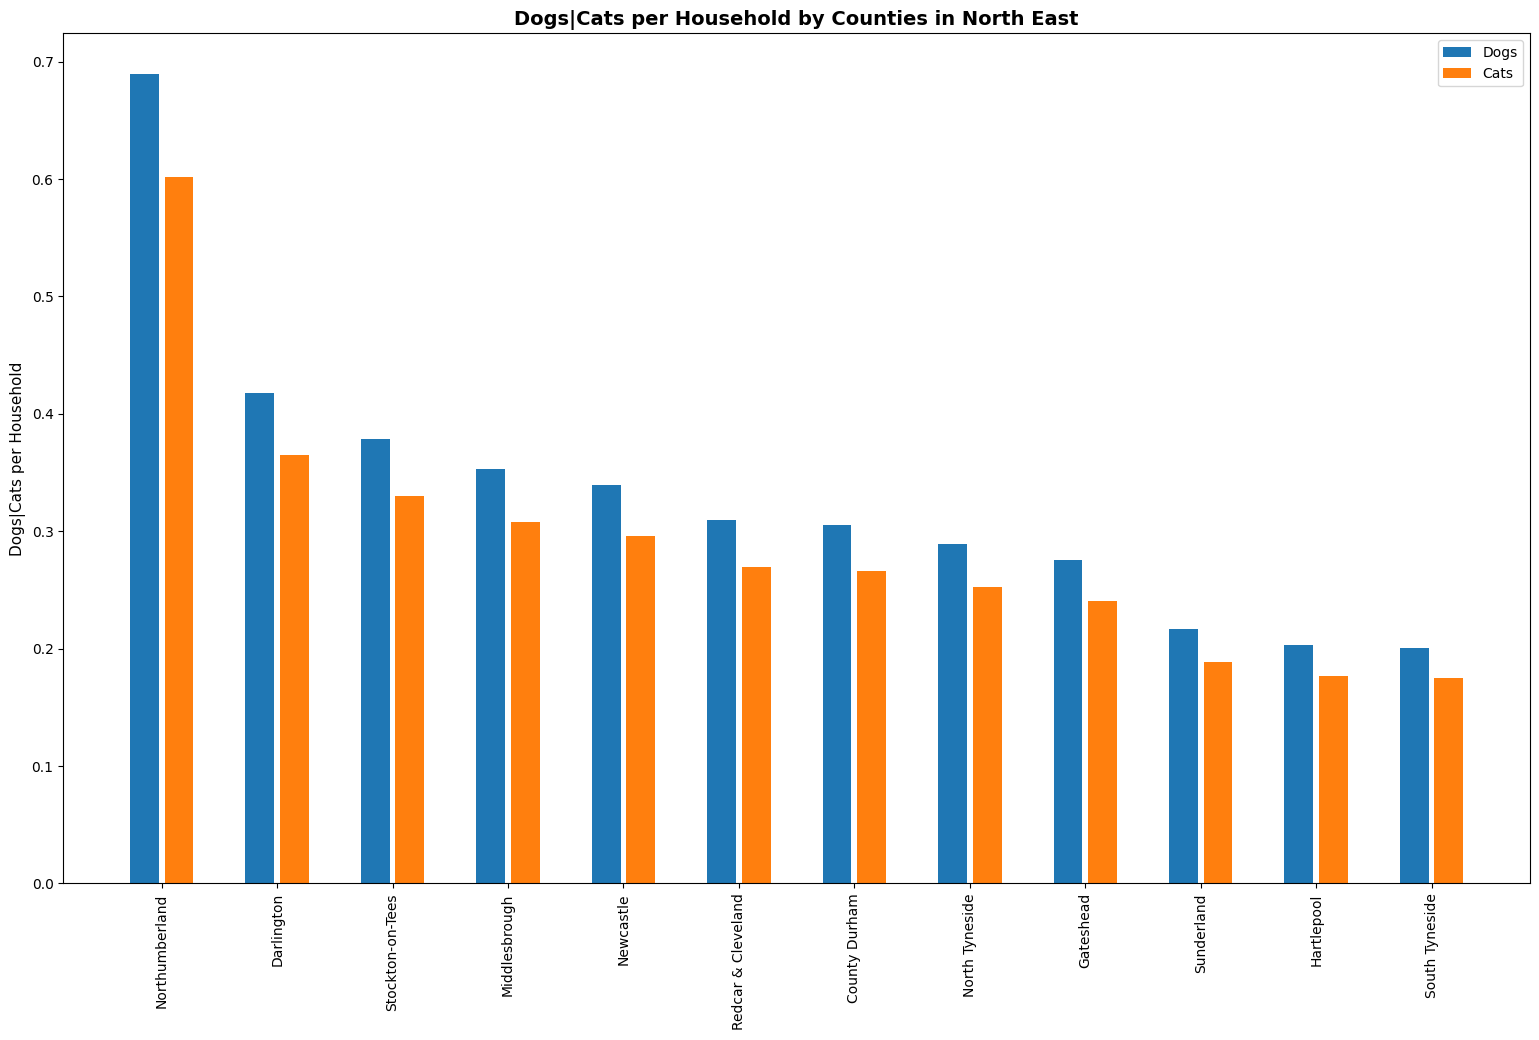

In [142]:
# Dog per household in each UK Region
for uk_reg in main_data_no_na.uk_region.unique():
    df1 = main_data_no_na[main_data_no_na.uk_region == uk_reg]
    plt_df = df1.groupby(by = 'county').mean().sort_values(by = 'dogs_per_household',
                                                                   ascending = False)
    X_axis = np.arange(len(plt_df.index.values)) 

    plt.bar(X_axis-0.15, 
            plt_df['dogs_per_household'],
            width = 0.25,
            label = 'Dogs')

    plt.bar(X_axis + 0.15, 
            plt_df['cats_per_household'],
            width = 0.25,
            label = 'Cats')

    plt.xticks(X_axis, list(plt_df.index.values)) 
    plt.ylabel('Dogs|Cats per Household', fontsize = 11)
    plt.title('Dogs|Cats per Household by Counties in '+ uk_reg, fontweight = 'bold' , fontsize = 14)
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

IN UK, people prefer to own a dogs rather than cats.